#### Siyuan "Kevin" Peng, Yuanzhe "Siris" Zheng, Yanlin "Jacky" Liu
![Image of Yaktocat](https://cdn.mos.cms.futurecdn.net/rLh7Dh7EKo8F6zmDtXYp8W.jpg)
# Table of Contents
1. [Introduction](#introduction)
2. [Install packages](#install-pkg)
3. [Data Dowloading](#data-download)
4. [Preprocessing](#preprocessing)<br>
    a. [Load and Clean Dataset](#load-and-clean)<br>
    b. [Data Analysis and Visualization](#data-ana-vis)
5. [Machine Learning Model](#ml-model)<br>
    a. [What and Why](#what-why)<br>
    b. [Training](#training)<br>
    c. [Result Anlysis and Demonstration](#result-and-demon)
6. [Future Application](#future-app)
7. [Reference and External Link](#ref-and-extlink)

## 1. Introduction <a name="introduction"></a>
TODO:

## 2. Install Packages <a name="install-pkg"></a>
```
pip install kaggle numpy matplotlib pandas sklearn
```
or use [environment.yml](https://github.com/syKevinPeng/game_sale_analysis/blob/main/environment.yml) to install packages in Conda environment
```
conda env update -f environment.yml
```
## 3. Data Downloading <a name="data-download"></a>

In [53]:
import kaggle
# remember to put kaggle.json to your C:/username/.kaggle
!kaggle datasets download -d ashaheedq/video-games-sales-2019

video-games-sales-2019.zip: Skipping, found more recently modified local copy (use --force to force download)


or directly download from kaggle webpage: [https://www.kaggle.com/ashaheedq/video-games-sales-2019](https://www.kaggle.com/ashaheedq/video-games-sales-2019)_
## 4. Preprocessing <a name="preprocessing"></a>
### 4.a. Load and Clean Data <a name="load-and-clean"></a>

In [54]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import locale

locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
df = pd.read_csv("vgsales-12-4-2019.csv")
additional = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-07-30/video_games.csv")
additional.head()

,number,game,release_date,price,owners,developer,publisher,average_playtime,median_playtime,metascore
0,1,Half-Life 2,"Nov 16, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,110.0,66.0,96.0
1,3,Counter-Strike: Source,"Nov 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,236.0,128.0,88.0
2,21,Counter-Strike: Condition Zero,"Mar 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,10.0,3.0,65.0
3,47,Half-Life 2: Deathmatch,"Nov 1, 2004",4.99,"5,000,000 .. 10,000,000",Valve,Valve,0.0,0.0,NaN
4,36,Half-Life: Source,"Jun 1, 2004",9.99,"2,000,000 .. 5,000,000",Valve,Valve,0.0,0.0,NaN


In [55]:
additional = additional.dropna(subset = ['owners', 'release_date'])
additional = additional.reset_index(drop = True)
additional['Critic_Score'] = additional['metascore']/10
additional['Year'] = additional['release_date']
additional['owners'] = additional['owners'].astype(str)
for i in range(len(additional)):
    str(additional.loc[i, 'owners'])
    nums = additional.loc[i, 'owners'].split('\xa0..\xa0')
#     print(nums)
    additional.loc[i, 'owners'] = float((locale.atoi(nums[1]) - locale.atoi(nums[0])) / 2000000)
#     print(additional.loc[i, 'owners'])
    temp = additional.loc[i, 'Year'].split(', ')
    if len(temp) != 2:
        additional.loc[i, 'Year'] = np.nan
    else:
        additional.loc[i, 'Year'] = int(temp[1])
#     print(additional.loc[i, 'Year'].split(', ')[1])
additional = additional.dropna(subset = ['release_date'])
additional = additional.drop(columns = ['number', 'price', 'average_playtime', 'median_playtime'])
additional.head()

,game,release_date,owners,developer,publisher,metascore,Critic_Score,Year
0,Half-Life 2,"Nov 16, 2004",5,Valve,Valve,96.0,9.6,2004
1,Counter-Strike: Source,"Nov 1, 2004",5,Valve,Valve,88.0,8.8,2004
2,Counter-Strike: Condition Zero,"Mar 1, 2004",5,Valve,Valve,65.0,6.5,2004
3,Half-Life 2: Deathmatch,"Nov 1, 2004",2.5,Valve,Valve,NaN,NaN,2004
4,Half-Life: Source,"Jun 1, 2004",1.5,Valve,Valve,NaN,NaN,2004


In [56]:
additional['Name'] = additional['game']
additional['Developer'] = additional['developer']
additional['Global_Sales'] = additional['owners']
df = df.dropna(subset = ['Year'])
df['Year'] = df['Year'].astype(int)

additional = additional.drop(columns=['metascore', 'release_date', 'publisher', 'game', 'developer', 'owners'])
df = df.drop(columns=['Rank', 'basename', 'Total_Shipped', 'Platform', 'Publisher', 'VGChartz_Score', 
                      'Last_Update', 'url', 'status', 'Vgchartzscore', 'img_url',  'User_Score'])
pd.merge(df, additional, on = ['Name', 'Year'] , how = 'left')
df.head()

,Name,Genre,ESRB_Rating,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,Wii Sports,Sports,E,Nintendo EAD,7.7,NaN,NaN,NaN,NaN,NaN,2006
1,Super Mario Bros.,Platform,NaN,Nintendo EAD,10.0,NaN,NaN,NaN,NaN,NaN,1985
2,Mario Kart Wii,Racing,E,Nintendo EAD,8.2,NaN,NaN,NaN,NaN,NaN,2008
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN,2017
4,Wii Sports Resort,Sports,E,Nintendo EAD,8.0,NaN,NaN,NaN,NaN,NaN,2009


In [57]:
df = df.dropna(subset=['Developer', 'Genre'])
df = df.reset_index(drop = True)
df['Sales_Ranking'] = df['Global_Sales']
for i in range(len(df)):
    df.loc[i, 'Developer'] = str(df.loc[i, 'Developer'])
    if df.loc[i, 'Sales_Ranking'] >= 10:
        df.loc[i, 'Sales_Ranking'] = 4
    elif df.loc[i, 'Sales_Ranking'] >= 5 and df.loc[i, 'Sales_Ranking'] < 10:
        df.loc[i, 'Sales_Ranking'] = 3
    elif df.loc[i, 'Sales_Ranking'] >= 1 and df.loc[i, 'Sales_Ranking'] < 5:
        df.loc[i, 'Sales_Ranking'] = 2
    else:
        df.loc[i, 'Sales_Ranking'] = 1
le = LabelEncoder()
# ohe = OneHotEncoder(handle_unknown = 'ignore')
df['Sales_Ranking'] = df['Sales_Ranking'].astype(int)
# df['Developer'] = le.fit_transform(df['Developer'])
df['Genre'] = le.fit_transform(df['Genre'])
df = df.dropna(subset=['Global_Sales', 'ESRB_Rating'])
df['ESRB_Rating'] = le.fit_transform(df['ESRB_Rating'])
# df_temp = pd.DataFrame(ohe.fit_transform(df[['Genre']]).toarray())

In [58]:

# df = df.join(df_temp)

df = df.reset_index(drop = True)
df = df[df['Global_Sales'] != 0.0]
df_for_visualization = df

In [59]:
df_for_training = df
df_for_training = df.drop(columns = ['Name', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score'])
df_for_training = df_for_training.dropna(subset = ['NA_Sales'])
temp_df = df_for_training.drop(columns=['Genre', 'ESRB_Rating', 'Developer', 'Year', 'Sales_Ranking'])

x = temp_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
temp_df = pd.DataFrame(x_scaled)

In [61]:
df_for_training['Global_Sales'] = temp_df[0]
df_for_training['NA_Sales'] = temp_df[1]
df_for_training = df_for_training.dropna(subset = ['Global_Sales', 'NA_Sales'])
df_for_training = df_for_training.reset_index(drop = True)
df_for_training['Developer'] = le.fit_transform(df_for_training['Developer'])
# Shuffle and reorder the dataframe
df_for_training = df_for_training.sample(frac=1)[['Genre','ESRB_Rating','Developer','NA_Sales','Year','Global_Sales','Sales_Ranking']]
df_for_training

,Genre,ESRB_Rating,Developer,NA_Sales,Year,Global_Sales,Sales_Ranking
9592,12,5,1355,0.005123,2002,0.002954,1
1533,15,5,1570,0.047131,2006,0.047267,1
2003,0,3,788,0.024590,2017,0.037912,1
2400,13,5,926,0.017418,2005,0.032004,1
8433,16,0,1763,0.010246,2009,0.004924,1
...,...,...,...,...,...,...,...
2032,17,0,57,0.038934,2002,0.037420,1
10905,10,0,126,0.003074,2004,0.001477,1
1121,17,0,492,0.013320,2012,0.061054,2
6280,1,1,181,0.011270,2015,0.009355,1


In [ ]:
### 4.b Data Analysis and Visualization' <a name="data-ana-vis"></a>

## 5. Machine Learning Model <a name="ml-model"></a>
In this section, we are going to implement several models and predict global sales. In the world of machine learning, people
can split datas into two groups: numerical data and categorical data. Numerical data is everything that represented by numbers (integer
and floating point). It's continuous. Categorical data, however, is discrete. Different models will be used to predict these two type of data.

It is obvious to predict sales as numerical data but we have the accuracy concern(we will see accuracy in the **Result Analysis and Demonstration** section)
since the data may not demonstrate a strong linear trend. Therefore, we hope to predict it as categorical data: sale score is divided into 4 categories.
Games in ">10" category are expected to sell so greate that its name will left in history -- Grand Theft Auto, Pokemon, Call of duty and etc. You name it.
Games in "5-10" category are sold less than the top ones, but they are still great games. "5-1" games are good games. there are still large amount of customer want to
put them into their gaming library. The rest of games can be put into "1-0" categories. We respect the efforts that game developers put into them but they are relatively
niche.
### 5.a What and Why <a name="what-why"></a>

We want to use *multiple linear regression* for predicting numerical sale number. The reason is that we intend to investigate
how strong the relationship is between many independent variables (in this case, critic score, developers and other variables) and
one dependent variable -- sale score. We made several assumptions for using multiple linear regression.
 - Homogeneity of Variance: the size of the error in our prediction doesn't change a lot
 - Independence of Observations: each game is independent of others.
 - Linearity: the line of best fit through the data point is a straight line.

Several models will be used for the prediction of categorical sale number: *Random forest*, *k-nearest neighbors* (KNN) and
*Support vector machine*(SVM)

Single decision tree suffers from a high variance, which makes them less accurate than other models. However, random forest fixes
this problem. Benefits of using random forests:
 -  Bagging and bootstrap reduce the output variance
 -  Able to handle large dataset with high dimensionality (which is our datset)

k-nearest neightbors, as one of the most famous classifications algorithm, surely have many positive sides:
 - No training period
 - Easily to add new data
 - Easy to implement

Here is the advantages of choosing support vector machine as one of our algorithem.
 -  Effective in high dimensional spaces
 -  Use a subset of training set in the decision function and, therefore, prevent overfitting
 -  Memory efficient

### 5.b Training <a name="training"></a>
**Multiple Linear Regression**
We will use sklearn library for most of our training task. Non-linear regression is little bit tricky and we wish to use scipy library for training.

In [69]:
from sklearn import linear_model, model_selection
from sklearn.ensemble import RandomForestClassifier
import sklearn

# build model for numerical predictors
muti_linear_regression = linear_model.LinearRegression(n_jobs=-1)

Explanation:

This is a very simple and straight-forward model with n_jobs = -1, which means we want to use all available CPU cores for efficiency purpose

In [67]:
# build model for categorical predictors
random_forest = RandomForestClassifier(n_estimators = 1000, random_state=42,max_depth=4,n_jobs = -1)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
svm = sklearn.svm.LinearSVC(max_iter=2000,dual=False)

Explanation:

To determine the number of trees (n_estimators in the function), we theoretically want as many trees as possible but the
margin of accuracy of getting more than 1000 trees become neglectable. random_state will increase the randomness when the algorithm is
bootstrapping.It is suggested that the maximum depth of the tree is sqrt(number of features), and also the
more depth of a tree, the better it perform with diminishing returns. I will just choose 4 and the benefit of more than 4 is too small. The number of jobs indicates how many
threads that are working in parallel.

As for kNN, to determine the number of neighbors, I did several experiments. It turns out that n_neightbors = 5 can generate best output. Too small n_neightbor will result in
unstable decision boundaries will too large will make the decision boundaries unclear.

SVM is little bit intriguing. There are two options for us to set the "decision_function_shape". One is "ovo", which stands for one-verses-one, and the other option is called one-vs-the-rest.
One-verse-one compare each classcifier with the predict value one by one while the one verse the rest option treats the x as a group and compare it with the y. In our case, we consider all the regressor
as a group. The reason why we set max_iter to 2000 is that it will not converge at default number of iterations

In [62]:
# Assign first several columns as X and last two columns as ground truth
X = df_for_training.iloc[:, 0:5]
y_categorical = df_for_training[['Sales_Ranking']].to_numpy().flatten()
y_numerical = df_for_training[['Global_Sales']].to_numpy().flatten()

In [72]:
# numerical model
# 10-fold cross validation for multi-linear regression:
linear_score = []
X = X.to_numpy()
for train_index, test_index in model_selection.KFold(n_splits=10).split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_numerical[train_index], y_numerical[test_index]
    model = muti_linear_regression.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    linear_score.append(score)
print('The average score for linear regression is ',np.average(linear_score))
print("The standard error of the score is ", np.std(linear_score))

The average score for linear regression is  0.8389972878343632
The standard error of the score is  0.02656213559835733


In [68]:
# categorical model
# Implement 10-fold cross validation
rfr_score = model_selection.cross_val_score(random_forest, X, y_categorical, cv = 10)
print("The average score for Random Forest is ", np.average(rfr_score))
print("The standard error of the score is ", np.std(rfr_score))
knn_score = model_selection.cross_val_score(knn, X, y_categorical, cv = 10)
print("The average score for kNN is ", np.average(knn_score))
print("The standard error of the score is ", np.std(knn_score))
svm_score = model_selection.cross_val_score(svm,X, y_categorical, cv = 10)
print("The average score for SVM is ", np.average(svm_score))
print("The standard error of the score is ", np.std(svm_score))

The average score for Random Forest is  0.9455400943212984
The standard error of the score is  0.005250425986782506
The average score for kNN is  0.8735466828271526
The standard error of the score is  0.007593598713356333
The average score for SVM is  0.8983963048427072
The standard error of the score is  0.01175409018656301


### Result Anlysis and Demonstration <a name="result-and-demon"></a>
Below is the bar graph of accuracy score for different models

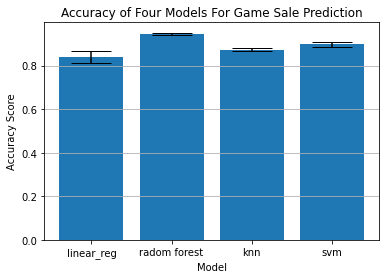

In [102]:
import matplotlib.pyplot as plt
models = ['linear_reg', 'radom forest', 'knn', 'svm']
scores = [linear_score,rfr_score, knn_score,svm_score]
accuracy = np.average(scores,axis=1)
std = np.std(scores,axis=1)
fig, ax = plt.subplots()
ax.bar(models,accuracy,align = 'center',yerr = std, capsize=20)
ax.set_xticks(models)
ax.set_title('Accuracy of Four Models For Game Sale Prediction')
ax.yaxis.grid(True)
ax.set_xlabel("Model")
ax.set_ylabel('Accuracy Score')
plt.show()

Random forest model has the best accuracy score and I think bagging and bootstrap could be the reason why it outperformed other models.
Also, the prediction for categorical variable generally better than the numerical prediction becuase, intuitively, predicting a category is
easier than a specific number.

Since we are interested in the difference between two variables for the same subject, we are going to perform paired-t test for the predicted value and the ground truth to see
the statistical difference between them. Our null hypothesis would be the average difference between the predicted value and ground truth is 0 and alternative hypothesis is the
average difference is not 0. We choose alpha value = 0.05

In [90]:
from scipy import stats
muti_linear_regression.fit(X,y_categorical)
pred_y = muti_linear_regression.predict(X)
print("paired t-test for random multi-linear regression is \n")
stats.ttest_rel(y_categorical, pred_y)

paired t-test for random multi-linear regression is 



Ttest_relResult(statistic=1.2374634887003975e-13, pvalue=0.9999999999999013)

In [91]:
random_forest.fit(X,y_categorical)
pred_y = random_forest.predict(X)
print("paired t-test for random forest result is \n")
stats.ttest_rel(y_categorical, pred_y)

paired t-test for random forest result is 



Ttest_relResult(statistic=9.064022064910278, pvalue=1.4630546520490245e-19)

In [84]:
knn.fit(X,y_categorical)
pred_y = knn.predict(X)
print("paired t-test for k nearest neighbor result is \n")
stats.ttest_rel(y_categorical, pred_y)

paired t-test for k nearest neighbor result is 



Ttest_relResult(statistic=23.45994627419661, pvalue=6.88479830215365e-119)

In [82]:
svm.fit(X,y_categorical)
pred_y = svm.predict(X)
print("paired t-test for support vector machine result is \n")
stats.ttest_rel(y_categorical, pred_y)

paired t-test for support vector machine result is 



Ttest_relResult(statistic=39.954277306310075, pvalue=0.0)

From above result, it is interesting to see that we failed reject null hypothesis (i.e. there is no difference between
the predicted value and ground truth for multi-linear regression paired-t test) but reject the null hypothesis (that is, there IS a difference)
for the rest of three paired-t test. However, according to the accuracy score, random forest model achieved the highest. Why does this happen?

According the formula that calculate t-value, we need to find the standard deviation of the difference between two groups. This standard deviation doesn't
make sense when it comes to category. You can think it as using l2 loss (mean squared error) instead of cross-entropy loss for categorical problem. Therefore,
we'd better directly use accuracy score for model-model comparison.

## 6. Future Application <a name="future-app"></a>
TODO:
## 7. Reference and External Link <a name="ref-and-extlink"></a>
#### Want to to know more about multiple linear regression?
 - https://www.scribbr.com/statistics/multiple-linear-regression/
 - https://en.wikipedia.org/wiki/Linear_regression
 - https://towardsdatascience.com/understanding-multiple-regression-249b16bde83e

#### Extend materials for support vector machine, Knn, random forest
 - https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
 - https://www.youtube.com/watch?v=1NxnPkZM9bc
 - https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
 - https://scikit-learn.org/stable/modules/svm.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### paired-t test reading:
 - https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS4-OneSampleTtest/SAS4-OneSampleTtest7.html